In [51]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [52]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Feature Engineering

In [54]:
#count missing values in each column
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [55]:
#count duplicate values
df.duplicated().sum()

0

In [56]:
#findout shape
df.shape

(8124, 23)

## Data Visualization

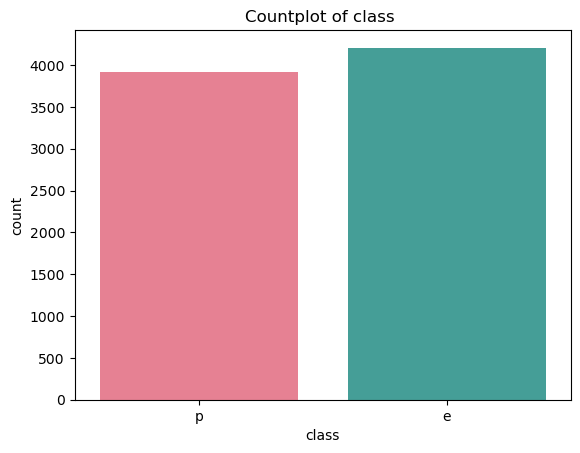

In [58]:
import warnings
warnings.filterwarnings('ignore')
#countplot is used to analyse categorical variables
sn.countplot(x='class',data=df,palette='husl')
plt.title('Countplot of class ')
plt.show()

In [59]:
# Get the count of each class
class_counts = df['class'].value_counts()

#Get the percentage of each class
class_percentage = df['class'].value_counts(normalize=True)*100
class_df = pd.DataFrame({'count':class_counts,'percentage':class_percentage})
class_df


,count,percentage
class,,
e,4208,51.797144
p,3916,48.202856


In [60]:
#Displays the count of each unique value in the 'class' column.
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [61]:
import pickle
with open('df.pkl','wb') as file:
    pickle.dump(df,file)

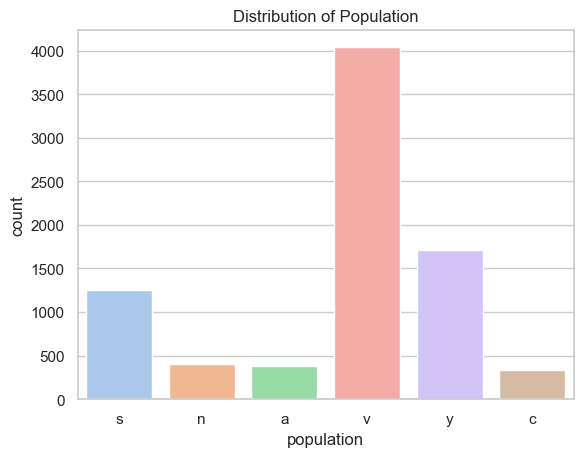

In [62]:
import warnings
warnings.filterwarnings('ignore')
sn.set(style='whitegrid')
sn.countplot(x='population',data=df,palette='pastel')
plt.title('Distribution of Population')
plt.show()

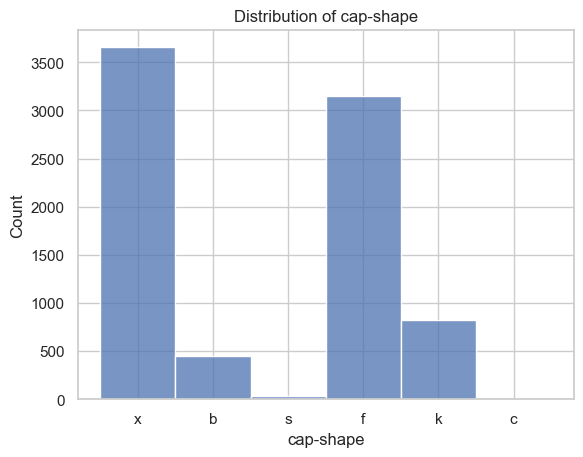

In [63]:
#histplot is used to show the distribution of numeric features
sn.histplot(df['cap-shape'],palette=sn.color_palette('pastel'))
plt.title('Distribution of cap-shape')
plt.show()

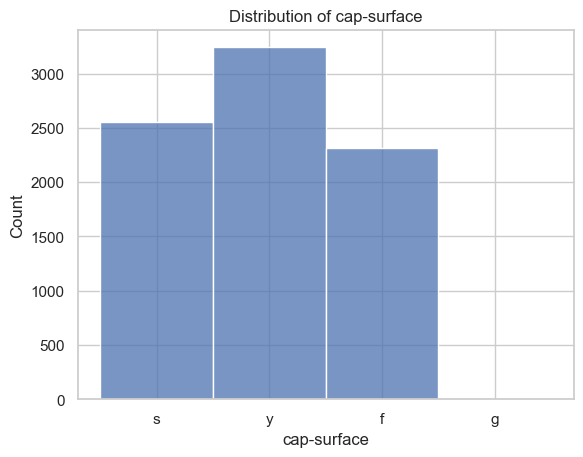

In [64]:
#histplot is used to show the distribution of numeric features
sn.histplot(df['cap-surface'],palette=sn.color_palette('pastel'))
plt.title('Distribution of cap-surface')
plt.show()

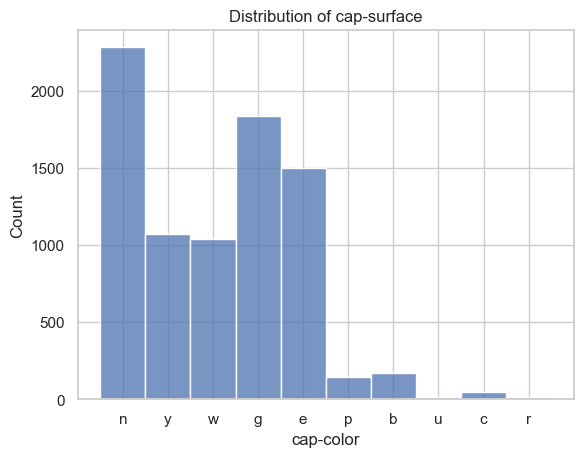

In [65]:
#histplot is used to show the distribution of numeric features
sn.histplot(df['cap-color'],palette=sn.color_palette('cubehelix',10))
plt.title('Distribution of cap-surface')
plt.show()

In [66]:
columns = df.columns
le=LabelEncoder()
for cols in columns:
 df[cols]=le.fit_transform(df[cols])
df.head()    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [67]:
with open('le.pkl','wb') as file:
    pickle.dump(df,file)

### The column "veil-type" is 0 and not contributing to the data so we remove it

In [69]:
df['veil-type'].value_counts()

veil-type
0    8124
Name: count, dtype: int64

In [70]:
df=df.drop(columns=['veil-type'])

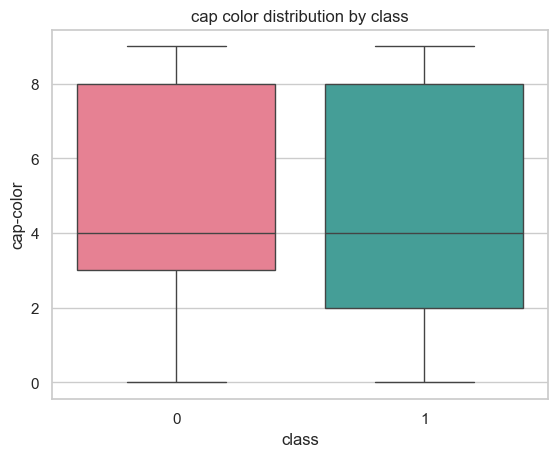

In [71]:
#boxplot is used to identify outlayers or compare distribution between categories
sn.boxplot(x='class',y='cap-color',data=df,palette='husl')
plt.title('cap color distribution by class')
plt.show()

In [72]:
#pairplot is used to relationship between multiple features
'''plt.figure(figsize=(10,7))
sn.pairplot(df,hue='class')
plt.show()'''

"plt.figure(figsize=(10,7))\nsn.pairplot(df,hue='class')\nplt.show()"

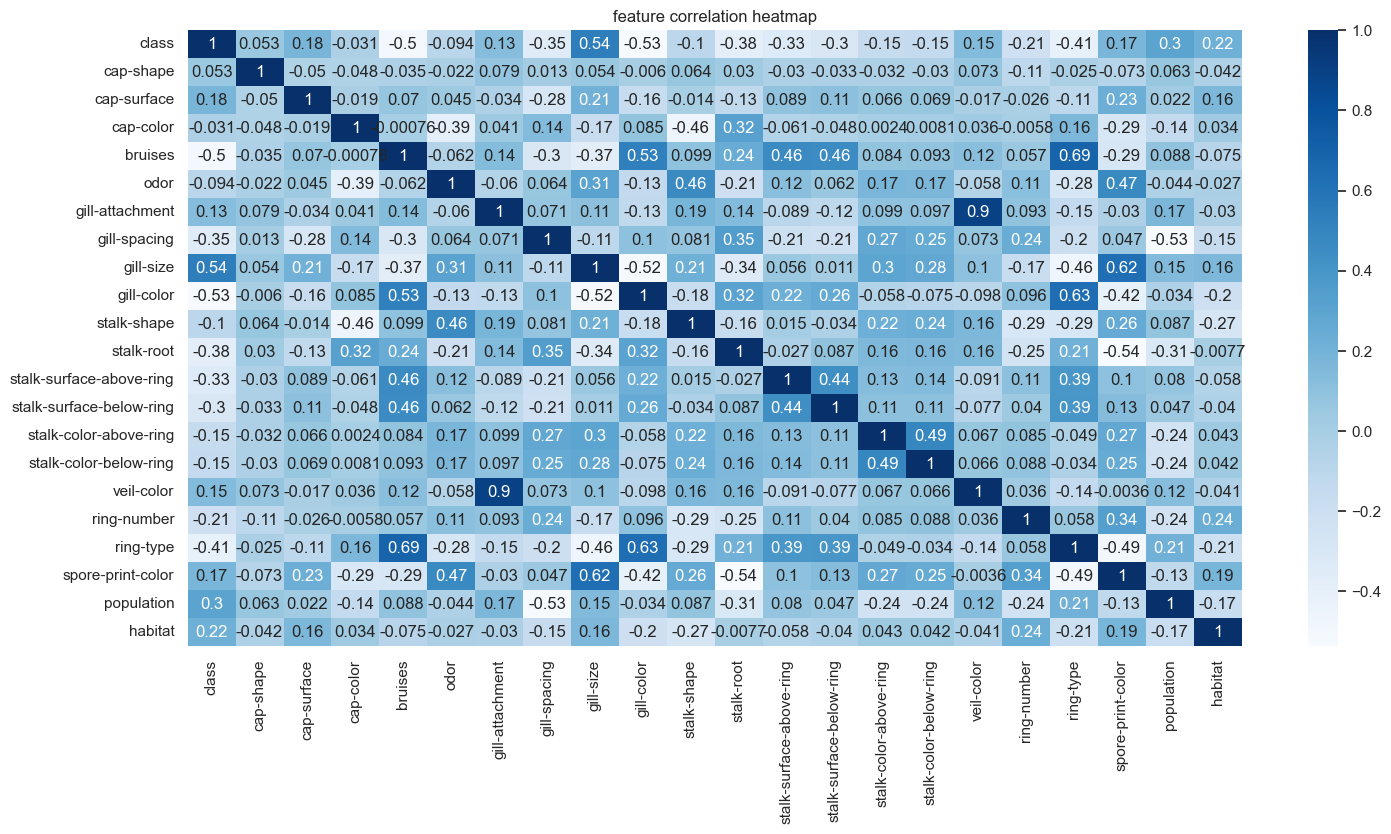

In [73]:
plt.figure(figsize=(17,8))
# correlation heatmap helps understand relationship between numerical features
sn.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title('feature correlation heatmap')
plt.show()

In [74]:
# Input features
x=df.drop(columns=['class'])

# Target variable
y=df['class']

# splitting the data
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.4,stratify=y,random_state=42)
x_test,x_cv,y_test,y_cv = train_test_split(x_temp,y_temp,test_size=0.5,stratify=y_temp,random_state=42)

In [75]:
results = pd.DataFrame(columns=['Model','Classifier','Train_Accuracy','Test_Accuracy','Precision_score','Recall_score','f1_score'])

### By all methods examined before the feature that is most important is "gill-color"

In [77]:
features_list = x.columns.values

## Apply Machine Learning Models

# K-Nearest Neighbors Classifier (KNN Classifier)

Apply Machine Learning Models

KNN

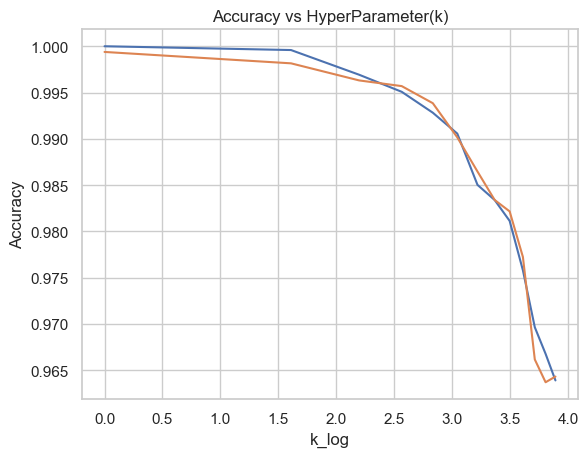

optimal_k 1


In [82]:
import math

k=list(range(1,50,4))
train_acc=[]
cv_acc=[]

for i in k:
    #Train KNeighborsClassifier with best n_neighors value
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    #predict the values based on x_train,x_cv
    y_train_pred = knn.predict(x_train)
    y_cv_pred = knn.predict(x_cv)
    #Evaluate the model perfomance
    train_acc.append(accuracy_score(y_train,y_train_pred))
    cv_acc.append(accuracy_score(y_cv,y_cv_pred))
# findout optimal_k based on max cv_acc
optimal_k = k[cv_acc.index(max(cv_acc))]

#apply log transformation to k for plotting
k_log = [math.log(x)  for x in k]

plt.plot(k_log,train_acc,label='Train Accuracy')
plt.plot(k_log,cv_acc,label='CV Accuracy')
plt.title('Accuracy vs HyperParameter(k)')
plt.xlabel('k_log')
plt.ylabel('Accuracy')
plt.show()
print('optimal_k',optimal_k)

In [83]:
#initial knn with optimal_K
knn=KNeighborsClassifier(n_neighbors=optimal_k)

#Trian the model
knn.fit(x_train,y_train)

#Predict values based on input features data
y_test_pred = knn.predict(x_test)
y_train_pred = knn.predict(x_train)

#calculate accuracy_score
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

#calculate precision,recall,f1_score
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)

print(f"train_accuracy : {train_accuracy:.2f}")
print(f"test_accuracy : {test_accuracy:.2f}")
print(f"precision_score : {precision:.2f}")
print(f"recall_score : {recall:.2f}")
print(f"f1_score : {f1:.2f}")


train_accuracy : 1.00
test_accuracy : 1.00
precision_score : 1.00
recall_score : 1.00
f1_score : 1.00


In [84]:
import pickle

with open('knn.pkl','wb') as file:
    pickle.dump(knn,file)

In [85]:
print("Predicted_values:",y_test_pred[:36])
print("Actual Values:   ",y_test[:36].values)

Predicted_values: [0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1]
Actual Values:    [0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1]


Text(47.24999999999999, 0.5, 'True values')

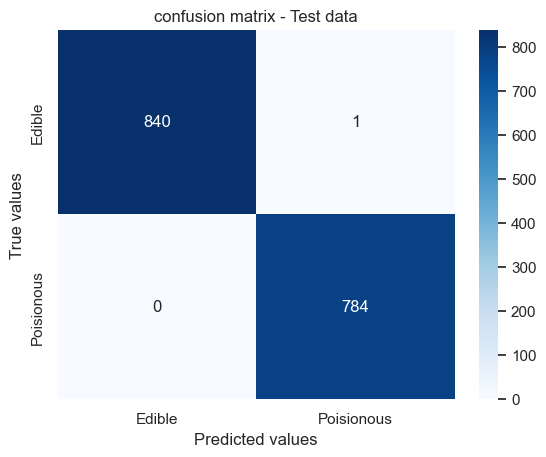

In [86]:
# Initial confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
x_axis_labels=["Edible","Poisionous"]
y_axis_labels=["Edible","Poisionous"]
#heatmap is used to relationship between numerical values
sn.heatmap(cfm,annot=True,fmt='d',cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.title("confusion matrix - Test data")
plt.xlabel('Predicted values')
plt.ylabel('True values')


In [87]:
data1 = ['K-Nearest Neighbors Classifier','KNeighborsClassifier',1.00,1.00,1.00,1.00,1.00]
results.loc[1]=data1

# Naive Bayes

In [89]:
#define alha values
alpha = [0.1,0.01,0.001,10,100,1000]

for values in alpha:
    mb=MultinomialNB(alpha=values)
    mb.fit(x_train,y_train)
    y_test_pred = mb.predict(x_test)
    y_train_pred = mb.predict(x_train)
    train_accuracy = accuracy_score(y_train,y_train_pred)
    test_accuracy = accuracy_score(y_test,y_test_pred)

    #calculate precision,recall,f1_score
    precision = precision_score(y_test,y_test_pred)
    recall = recall_score(y_test,y_test_pred)
    f1 = f1_score(y_test,y_test_pred) 
    
print(f"train_accuracy : {train_accuracy:.2f}")
print(f"test_accuracy : {test_accuracy:.2f}")
print(f"precision_score : {precision:.2f}")
print(f"recall_score : {recall:.2f}")
print(f"f1_score : {f1:.2f}")


train_accuracy : 0.79
test_accuracy : 0.79
precision_score : 0.87
recall_score : 0.66
f1_score : 0.75


Text(47.25, 0.5, 'True values')

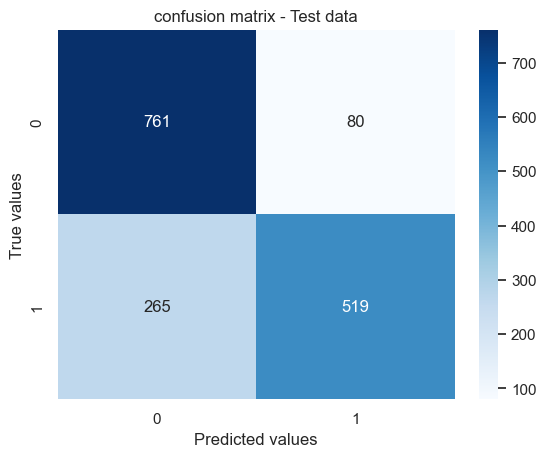

In [90]:
# Initial confusion_matrix
cfm = confusion_matrix(y_test,y_test_pred)
#heatmap is used to relationship between numerical values
sn.heatmap(cfm,annot=True,fmt='d',cmap='Blues')
plt.title("confusion matrix - Test data")
plt.xlabel('Predicted values')
plt.ylabel('True values')

In [91]:
data2 = ['Naive Bayes with MultinomialNB','MultimomialNB',0.79,0.78,0.87,0.65,0.75]
results.loc[2]=data2


In [92]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

mb=GaussianNB()
mb.fit(x_train,y_train)
y_test_pred = mb.predict(x_test)
y_train_pred = mb.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

#calculate precision,recall,f1_score
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred) 
cls = classification_report(y_test,y_test_pred)

print(f"train_accuracy : {train_accuracy:.2f}")
print(f"test_accuracy : {test_accuracy:.2f}")
print(f"precision_score : {precision:.2f}")
print(f"recall_score : {recall:.2f}")
print(f"f1_score : {f1:.2f}")
print(cls)

train_accuracy : 0.91
test_accuracy : 0.91
precision_score : 0.89
recall_score : 0.92
f1_score : 0.90
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       841
           1       0.89      0.92      0.90       784

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625



In [93]:
import pickle

with open('mb.pkl','wb') as file:
    pickle.dump(mb,file)

In [94]:
data3 = ['Naive Bayes with GaussianNB','GaussianNB',0.91,0.91,0.89,0.92,0.90]
results.loc[3]=data3


# Logistic Regression with L1

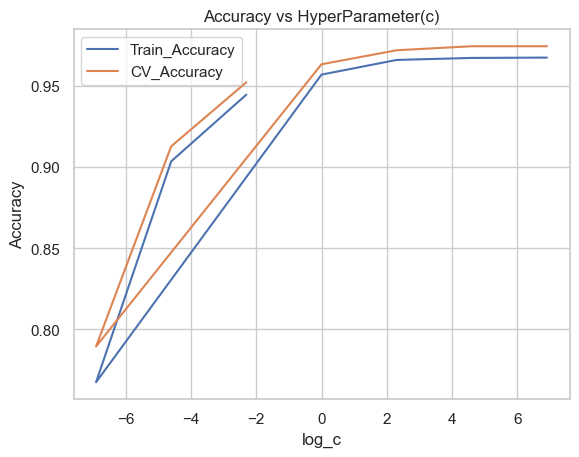

optimal_c 100


In [96]:
c=[0.1,0.01,0.001,1,10,100,1000]
train_acc =[]
cv_acc=[]

for i in c:
    lr = LogisticRegression(penalty='l1',C=i,solver='liblinear')
    lr.fit(x_train,y_train)
    y_cv_pred = lr.predict(x_cv)
    y_train_pred = lr.predict(x_train)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    cv_acc.append(accuracy_score(y_cv,y_cv_pred))
optimal_c = c[cv_acc.index(max(cv_acc))]

# apply log transformation to k for platting
log_c = [math.log(x) for x in c]

plt.plot(log_c,train_acc,label = 'Train_Accuracy')
plt.plot(log_c,cv_acc,label='CV_Accuracy')
plt.title('Accuracy vs HyperParameter(c)')
plt.xlabel('log_c')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('optimal_c',optimal_c)

In [97]:
import warnings
warnings.filterwarnings('ignore')
lr1 = LogisticRegression(penalty='l1',solver='liblinear',C=optimal_c)
lr1.fit(x_train,y_train)
y_test_pred = lr1.predict(x_test)
y_train_pred = lr1.predict(x_train)
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred) 

print(f"train_accuracy : {train_acc:.3f}")
print(f"test_accuracy : {test_acc:.3f}")
print(f"precision_score : {precision:.3f}")
print(f"recall_score : {recall:.3f}")
print(f"f1_score : {f1:.3f}")

train_accuracy : 0.967
test_accuracy : 0.962
precision_score : 0.959
recall_score : 0.962
f1_score : 0.961


In [98]:
import pickle

with open('lr1.pkl','wb') as file:
    pickle.dump(lr1,file)

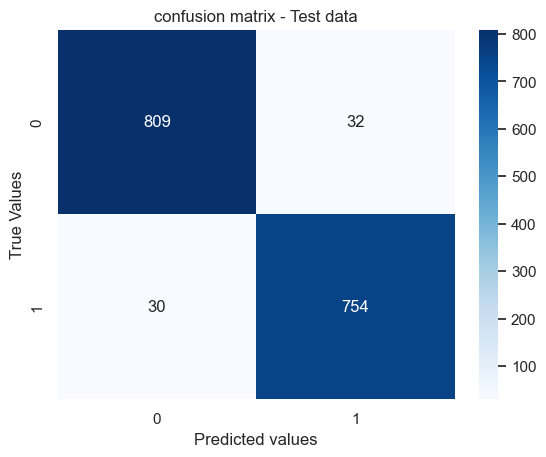

In [99]:
cfm = confusion_matrix(y_test,y_test_pred)
sn.heatmap(cfm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix - Test data')
plt.xlabel('Predicted values')
plt.ylabel('True Values')
plt.show()

In [100]:
data4 = ['Logistic Regression with l1','LogisticRegression',0.967,0.962,0.959,0.962,0.961]
results.loc[4]=data4

# Logistic Regression with l2

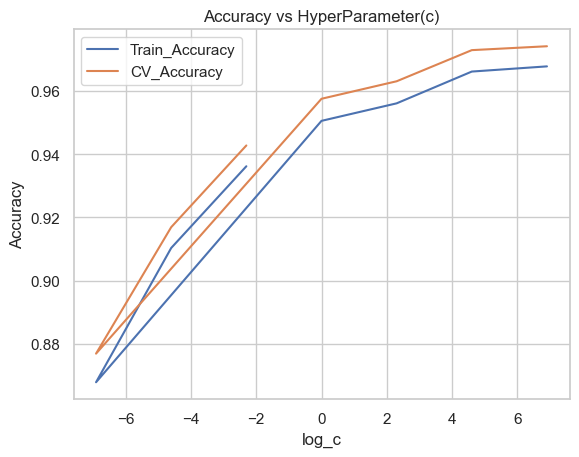

optimal_c 1000


In [102]:
c=[0.1,0.01,0.001,1,10,100,1000]
train_acc =[]
cv_acc=[]

for i in c:
    # Train Logistic Regression with the best C value
    lr = LogisticRegression(penalty='l2',C=i,solver='liblinear')
    lr.fit(x_train,y_train)
    y_cv_pred = lr.predict(x_cv)
    y_train_pred = lr.predict(x_train)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    cv_acc.append(accuracy_score(y_cv,y_cv_pred))
optimal_c = c[cv_acc.index(max(cv_acc))]

# apply log transformation to k for platting
log_c = [math.log(x) for x in c]

plt.plot(log_c,train_acc,label = 'Train_Accuracy')
plt.plot(log_c,cv_acc,label='CV_Accuracy')
plt.title('Accuracy vs HyperParameter(c)')
plt.xlabel('log_c')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('optimal_c',optimal_c)

In [103]:
# Train Logistic Regression with the best C value
lr2 = LogisticRegression(penalty='l2',solver='liblinear',C=optimal_c)
lr2.fit(x_train,y_train)
y_test_pred = lr2.predict(x_test)
y_train_pred = lr2.predict(x_train)
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred) 
print(f"train_accuracy : {train_acc:.3f}")
print(f"test_accuracy : {test_acc:.3f}")
print(f"precision_score : {precision:.3f}")
print(f"recall_score : {recall:.3f}")
print(f"f1_score : {f1:.3f}")

train_accuracy : 0.968
test_accuracy : 0.962
precision_score : 0.959
recall_score : 0.962
f1_score : 0.961


In [104]:
import pickle

with open('lr2.pkl','wb') as file:
    pickle.dump(lr2,file)

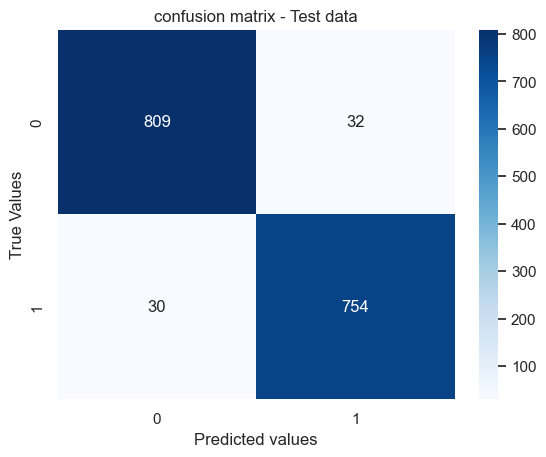

In [105]:
cfm = confusion_matrix(y_test,y_test_pred)
sn.heatmap(cfm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix - Test data')
plt.xlabel('Predicted values')
plt.ylabel('True Values')
plt.show()

In [106]:
data5=['Logistic regression with l2','Logistic Regression',0.967,0.962,0.959,0.962,0.961]
results.loc[5]=data5

## LogisticRegression with Elastic


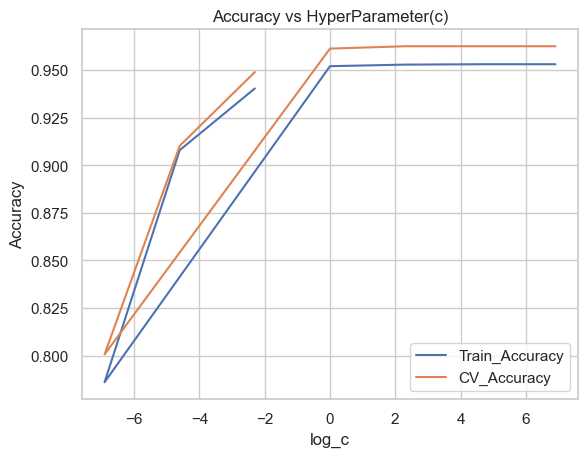

optimal_c 10


In [108]:
c=[0.1,0.01,0.001,1,10,100,1000]
train_acc =[]
cv_acc=[]

for i in c:
    # Train Logistic Regression with the best C value
    lr = LogisticRegression(penalty='elasticnet',C=i,solver='saga',l1_ratio=0.5)
    lr.fit(x_train,y_train)
    y_cv_pred = lr.predict(x_cv)
    y_train_pred = lr.predict(x_train)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    cv_acc.append(accuracy_score(y_cv,y_cv_pred))
optimal_c = c[cv_acc.index(max(cv_acc))]

# apply log transformation to k for platting
log_c = [math.log(x) for x in c]

plt.plot(log_c,train_acc,label = 'Train_Accuracy')
plt.plot(log_c,cv_acc,label='CV_Accuracy')
plt.title('Accuracy vs HyperParameter(c)')
plt.xlabel('log_c')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('optimal_c',optimal_c)

In [109]:
# Train Logistic Regression with the best C value
lr3 = LogisticRegression(penalty='l2',solver='liblinear',C=optimal_c)
lr3.fit(x_train,y_train)
y_test_pred = lr3.predict(x_test)
y_train_pred = lr3.predict(x_train)
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred) 
print(f"train_accuracy : {train_acc:.3f}")
print(f"test_accuracy : {test_acc:.3f}")
print(f"precision_score : {precision:.3f}")
print(f"recall_score : {recall:.3f}")
print(f"f1_score : {f1:.3f}")

train_accuracy : 0.956
test_accuracy : 0.953
precision_score : 0.953
recall_score : 0.950
f1_score : 0.951


In [110]:
import pickle

with open('lr3.pkl','wb') as file:
    pickle.dump(lr3,file)

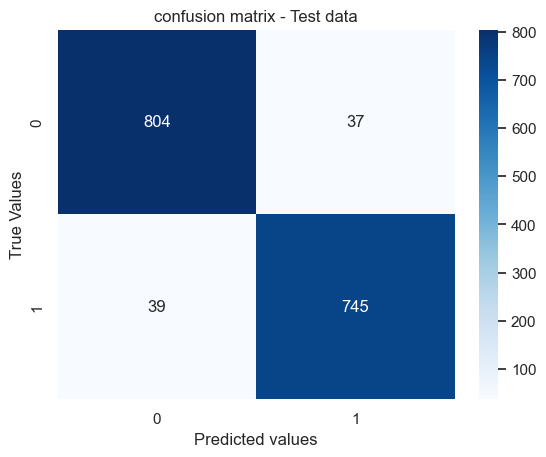

In [111]:
cfm = confusion_matrix(y_test,y_test_pred)
sn.heatmap(cfm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix - Test data')
plt.xlabel('Predicted values')
plt.ylabel('True Values')
plt.show()

In [112]:
data6=['Logistic regression with elastic','Logistic Regression',0.956,0.953,0.953,0.950,0.951]
results.loc[6]=data6

# Decision Tree

In [114]:
# Initialize the Decision Tree model
dtc= DecisionTreeClassifier()
# Define the parameter grid for hyperparameter tuning
param_grid={
    'max_depth':[1,5,10,50,500,1000],         #Limits the tree depth to prevent overfitting
    'min_samples_split':[20,40,60,80,100,120]  #Ensures splits happen only when there are enough samples, controlling complexity.
}
# Perform Grid Search with Cross-Validation
model = GridSearchCV(dtc,param_grid,cv=5,n_jobs=-1)
model.fit(x_train,y_train)

# Get the best parameters
best_max_depth = model.best_estimator_.max_depth
best_min_samples_split = model.best_estimator_.min_samples_split
print('best_max_depth',best_max_depth)
print('best_min_samples_split',best_min_samples_split)

best_max_depth 10
best_min_samples_split 20


In [115]:
# initialize the DecisionTreeClassifier with max_depth,min_samples_split values
dtc = DecisionTreeClassifier(max_depth=best_max_depth,min_samples_split=best_min_samples_split)

#train the model
dtc.fit(x_train,y_train)

#predict the values
y_test_pred = dtc.predict(x_test)
y_train_pred = dtc.predict(x_train)

#Evaluate the model perfomance
train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred) 

print(f"train_acc : {train_acc:.3f}")
print(f"test_acc : {test_acc:.3f}")
print(f"precision_score : {precision:.3f}")
print(f"recall_score : {recall:.3f}")
print(f"f1_score : {f1:.3f}")

train_acc : 0.999
test_acc : 0.998
precision_score : 1.000
recall_score : 0.996
f1_score : 0.998


In [116]:
import pickle

with open('dtc.pkl','wb') as file:
    pickle.dump(dtc,file)

In [ ]:
# feature_importance = np.array([0.2, 0.35, 0.1, 0.25, 0.1])
# sorted_idx = np.argsort(feature_importance)
# print(sorted_idx)
# array([2, 4, 0, 3, 1])
# Feature 2 (importance = 0.1) → Least Important
# Feature 4 (importance = 0.1) → Least Important
# Feature 0 (importance = 0.2) → Less Important
# Feature 3 (importance = 0.25) → More Important
# Feature 1 (importance = 0.35) → Most Important


## Feature Importance

### By all methods examined before the feature that is most important is "gill-color".

[0.         0.01515338 0.00414126 0.         0.         0.
 0.         0.12607004 0.33616324 0.03049728 0.04805415 0.
 0.00262607 0.0150162  0.00667132 0.         0.00138242 0.00548898
 0.21046539 0.17432984 0.02394041]
[ 0  3  4  5  6 15 11 16 12  2 17 14 13  1 20  9 10  7 19 18  8]


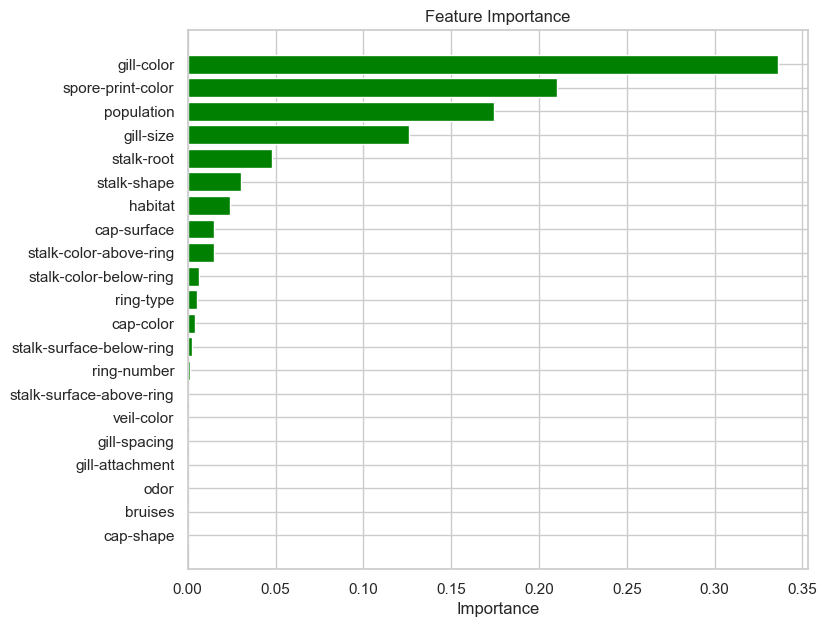

In [150]:
import numpy as np
features_list = x.columns.values
#extract feature importance score
feature_importance = dtc.feature_importances_
#Get sorted indices
#np.argsort(feature_importance) returns the indices of features sorted in ascending order (from least to most important).
sorted_idx = np.argsort(feature_importance)
print(sorted_idx)
#create barplot
plt.figure(figsize=(8,7))
#bargraph in horizontal 
#feature_importance[sorted_index
plt.barh(range(len(sorted_idx)),feature_importance[sorted_idx],align='center',color='green')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx]) 
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [120]:
'''Index:   0    1    2    3
Value:  0.1  0.4  0.3  0.2
#after
Value:  0.1  0.2  0.3  0.4
Index:   0    3    2    1  age sort working

plt.barh(...) creates a horizontal bar plot.
range(len(sorted_idx)) gives the Y-axis positions for the bars.
feature_importance[sorted_idx] retrieves the sorted importance values.
align='center' ensures bars are centered along the Y-axis ticks.
color="red" sets the bar color to red.
range(len(sorted_idx)) → [0, 1, 2, 3] (Y-axis positions).
feature_importance[sorted_idx] → [0.1, 0.2, 0.3, 0.4] (sorted importance values).
range(len(sorted_idx)) gives Y-tick positions: [0, 1, 2, 3].
features_list[sorted_idx] gives sorted feature names
'''


'Index:   0    1    2    3\nValue:  0.1  0.4  0.3  0.2\n#after\nValue:  0.1  0.2  0.3  0.4\nIndex:   0    3    2    1  age sort working\n\nplt.barh(...) creates a horizontal bar plot.\nrange(len(sorted_idx)) gives the Y-axis positions for the bars.\nfeature_importance[sorted_idx] retrieves the sorted importance values.\nalign=\'center\' ensures bars are centered along the Y-axis ticks.\ncolor="red" sets the bar color to red.\nrange(len(sorted_idx)) → [0, 1, 2, 3] (Y-axis positions).\nfeature_importance[sorted_idx] → [0.1, 0.2, 0.3, 0.4] (sorted importance values).\nrange(len(sorted_idx)) gives Y-tick positions: [0, 1, 2, 3].\nfeatures_list[sorted_idx] gives sorted feature names\n'

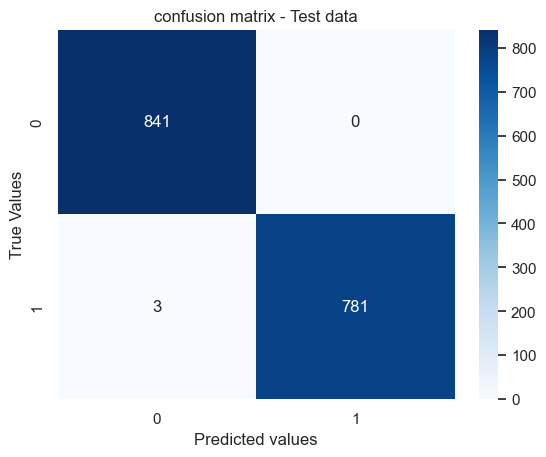

In [121]:
cfm = confusion_matrix(y_test,y_test_pred)
sn.heatmap(cfm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix - Test data')
plt.xlabel('Predicted values')
plt.ylabel('True Values')
plt.show()

In [122]:
data7 = ['Decision Tree','DecisionTreeClassifier',0.999,0.998,1.000,0.996,0.998]
results.loc[7]=data7

# RandomForestClassifier

In [124]:
#initialize randomforestclassifier
rfc = RandomForestClassifier()
param_grid = {
    'max_depth' : [0.1,0.01,0.001,1,10,100,1000],  #Prevents trees from growing too deep, reducing overfitting.
    'min_samples_split':[20,40,60,80,100,120]
}
#Finds the best hyperparameters using cross-validation.
model = GridSearchCV(rfc,param_grid,cv=5,n_jobs=-1)

#train the model
model.fit(x_train,y_train)

best_max_depth = model.best_estimator_.max_depth
best_min_samples_split = model.best_estimator_.min_samples_split
print('best_max_depth',best_max_depth)
print('best_min_samples_split',best_min_samples_split)

best_max_depth 100
best_min_samples_split 20


In [125]:
rdf = RandomForestClassifier(max_depth = best_max_depth,min_samples_split = best_min_samples_split)

#train the model
rdf.fit(x_train,y_train)

#predict the values
y_test_pred = rdf.predict(x_test)
y_train_pred = rdf.predict(x_train)

train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred) 

print(f"train_acc : {train_acc:.3f}")
print(f"test_acc : {test_acc:.3f}")
print(f"precision_score : {precision:.3f}")
print(f"recall_score : {recall:.3f}")
print(f"f1_score : {f1:.3f}")

train_acc : 1.000
test_acc : 1.000
precision_score : 1.000
recall_score : 1.000
f1_score : 1.000


In [126]:
import pickle

with open('rdf.pkl','wb') as file:
    pickle.dump(rdf,file)

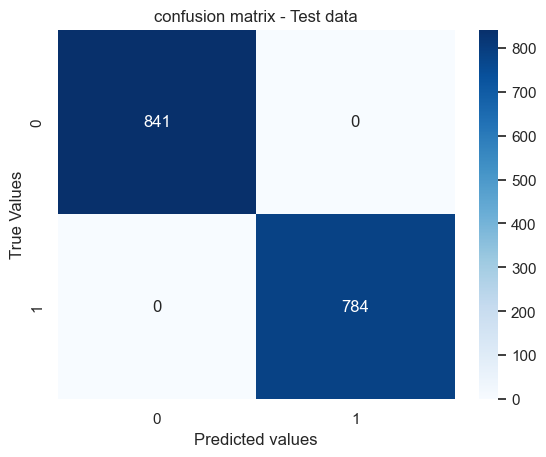

In [127]:
cfm = confusion_matrix(y_test,y_test_pred)
sn.heatmap(cfm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix - Test data')
plt.xlabel('Predicted values')
plt.ylabel('True Values')
plt.show()

In [128]:
data8 = ['Random Forest','RandomForestClassifier',1.000,1.000,1.000,1.000,1.000]
results.loc[8] = data8

# Support Vector Machine (SVM) 

In [130]:
# define C values
c_values = [0.1,0.01,0.001,1,10,100,1000]
#kernel is used to crate transformation on  existing fetaures_data to draw decision boundary easily
for c in c_values:
    #Initialize the SVM model with the current C value
    svm_model = SVC(C=c,kernel = 'linear',random_state=42)

    #Train the model
    svm_model.fit(x_train,y_train)

    #predict the values
    y_test_pred = svm_model.predict(x_test)
    y_train_pred = svm_model.predict(x_train)
    

    #Evaluate the model perfomance
    train_accu = accuracy_score(y_train,y_train_pred)
    test_accu = accuracy_score(y_test,y_test_pred)
    precision = precision_score(y_test,y_test_pred)
    recall = recall_score(y_test,y_test_pred)
    f1 = f1_score(y_test,y_test_pred) 
''
print(f"train_accuracy : {train_accu:.3f}")
print(f"test_accuracy : {test_accu:.3f}")
print(f"precision_score : {precision:.3f}")
print(f"recall_score : {recall:.3f}")
print(f"f1_score : {f1:.3f}")

'# define C values\nc_values = [0.1,0.01,0.001,1,10,100,1000]\n#kernel is used to crate transformation on  existing fetaures_data to draw decision boundary easily\nfor c in c_values:\n    #Initialize the SVM model with the current C value\n    svm_model = SVC(C=c,kernel = \'linear\',random_state=42)\n\n    #Train the model\n    svm_model.fit(x_train,y_train)\n\n    #predict the values\n    y_test_pred = svm_model.predict(x_test)\n    y_train_pred = svm_model.predict(x_train)\n    \n\n    #Evaluate the model perfomance\n    train_accu = accuracy_score(y_train,y_train_pred)\n    test_accu = accuracy_score(y_test,y_test_pred)\n    precision = precision_score(y_test,y_test_pred)\n    recall = recall_score(y_test,y_test_pred)\n    f1 = f1_score(y_test,y_test_pred) \n\'\'\nprint(f"train_accuracy : {train_accu:.3f}")\nprint(f"test_accuracy : {test_accu:.3f}")\nprint(f"precision_score : {precision:.3f}")\nprint(f"recall_score : {recall:.3f}")\nprint(f"f1_score : {f1:.3f}")'

In [131]:
import pickle

with open('svm_model.pkl','wb') as file:
    pickle.dump(svm_model,file)

NameError: name 'svm_model' is not defined

In [ ]:
'''cfm = confusion_matrix(y_test,y_test_pred)
sn.heatmap(cfm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix - Test data')
plt.xlabel('Predicted values')
plt.ylabel('True Values')
plt.show()'''

In [132]:
data9 = ['Support Vector Machine','SupportVectorClassifier',0.990,0.991,0.981,1.000,0.991]
results.loc[9] =data9

In [134]:
import xgboost as xgb

## Xgboost 

In [136]:
import xgboost as xgb
#initialize the xgboostclassifier
model = xgb.XGBClassifier(
    max_depth = 3,  # maximum depth of each tree
    n_estimators = 100, # no.of boosting rounds(decision tree)
    random_state=42
)
model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
test_acc = accuracy_score(y_test,y_test_pred)
train_acc =accuracy_score(y_train,y_train_pred)

precision = precision_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred) 
print(f"train_accuracy : {train_acc:.3f}")
print(f"test_accuracy : {test_acc:.3f}")
print(f"precision_score : {precision :.3f}")
print(f"recall_score : {recall :.3f}")
print(f"f1_score : {f1 :.3f}")

train_accuracy : 1.000
test_accuracy : 1.000
precision_score : 1.000
recall_score : 1.000
f1_score : 1.000


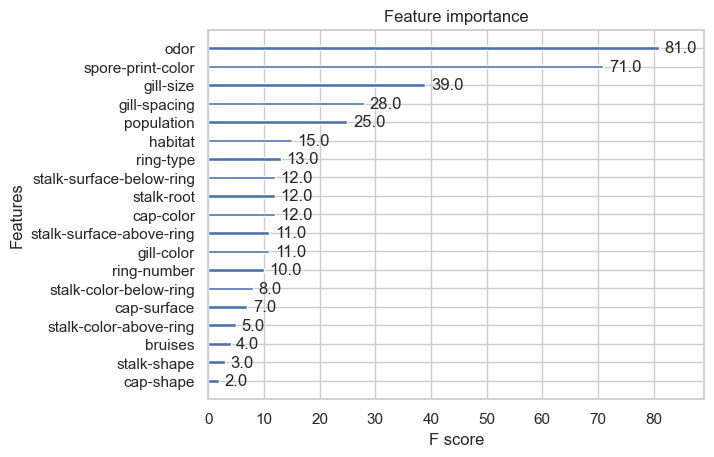

In [138]:
# Plot feature importance
xgb.plot_importance(model)
plt.show()


In [ ]:
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
pip install --upgrade pip

In [ ]:
#pip install --upgrade scikit-learn xgboost


In [ ]:
data9 = ['xgboost','XGBClassifier',1.000,1.000,0.981,1.000,0.991]
results.loc[9] =data9

# perfomance Table

In [ ]:
results